# 911 Calls Capstone Project 
For this project we will be analyzing 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert).

<hr>

## Data and Setup

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
sns.set_style('whitegrid')

In [94]:
df = pd.read_csv('files/911.csv')

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [96]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


<hr>

## Basic Questions

**What are the top 5 zipcodes for 911 calls?**

In [97]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

**What are the top 5 townships (twp) for 911 calls?**

In [98]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

**Take a look at the 'title' column, how many unique title codes are there?**

In [99]:
len(df['title'].unique())

110

<hr>

## Creating new features

**In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.**

**For example, if the title column value is EMS: BACK PAINS/INJURY, the Reason column would be EMS.**

In [100]:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])

In [101]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


**What is the most common Reason for a 911 call based off of this new column?**

In [102]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

**Now use seaborn to create a countplot of 911 calls by Reason.**

<AxesSubplot: xlabel='Reason', ylabel='count'>

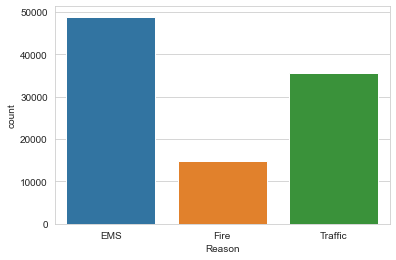

In [103]:
sns.countplot(data=df, x='Reason')

<hr>

**Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column?**

In [104]:
type(df['timeStamp'].iloc[0])

str

**The timestamps are in strings. Use [pd.to_datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) to convert the column from string to DateTime objects.**

In [105]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS


**Now we can grab specific attributes from a Datetime object by calling them. For example:**<br>
`time = df['timeStamp'].iloc[0]`<br>
`time.hour`

**Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week.**

In [106]:
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['Day of Week'] = df['timeStamp'].apply(lambda x: x.day_of_week)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


**Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actualstring names to the day of the week:**

`dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}`

In [107]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [108]:
df['Day of Week'] = df['Day of Week'].apply(lambda x: dmap[x])

In [109]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


**Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.**

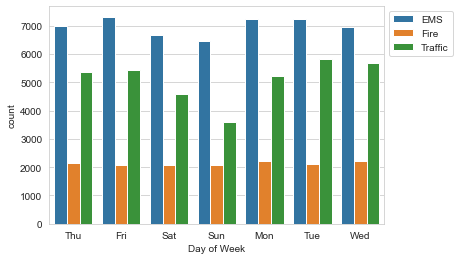

In [110]:
sns.countplot(data=df, x='Day of Week', hue='Reason')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

**Now do the dame for Month:**

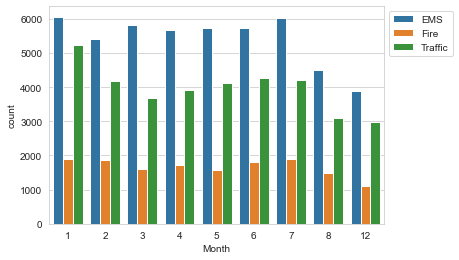

In [111]:
sns.countplot(data=df, x='Month', hue='Reason')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

**There is something stange about the Plot**

**The plot is missing some Months. Let's see if we can maybe fill in this information by plotting the information in some other way, possibly a simple line plot.**

**Create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame.**

In [124]:
df_groupby_month = df.groupby('Month').count()
df_groupby_month

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


**Now create a simple plot off of the dataframe indicationg the count of calls per month.**

<AxesSubplot: xlabel='Month', ylabel='Reason'>

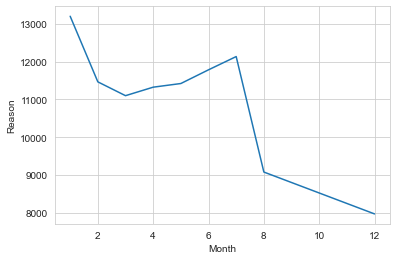

In [125]:
sns.lineplot(data=df_groupby_month, x='Month', y='Reason')

**Now use seaborn's lmplot() to create a linear fit on the number of calls per month.**

In [127]:
# Here we first need to make index as column
df_groupby_month.reset_index(inplace=True)

df_groupby_month.head()

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


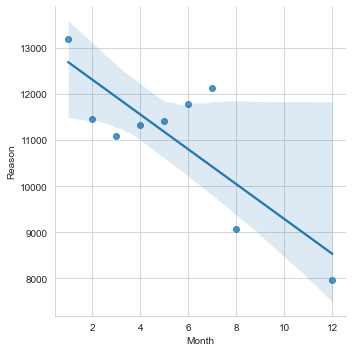

In [128]:
sns.lmplot(data=df_groupby_month, x='Month', y='Reason')

<hr>

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method.**

In [131]:
df['Date'] = df['timeStamp'].apply(lambda x: x.date())
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


**Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

In [138]:
df_groupby_date = df.groupby('Date').count()
df_groupby_date.reset_index(inplace=True)
df_groupby_date

,Date,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115
1,2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396
2,2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403
3,2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319
4,2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,2016-08-20,328,328,328,279,328,328,328,327,328,328,328,328,328
255,2016-08-21,357,357,357,299,357,357,357,352,357,357,357,357,357
256,2016-08-22,389,389,389,336,389,389,388,384,389,389,389,389,389
257,2016-08-23,439,439,439,390,439,439,439,437,439,439,439,439,439


[Ellipsis]

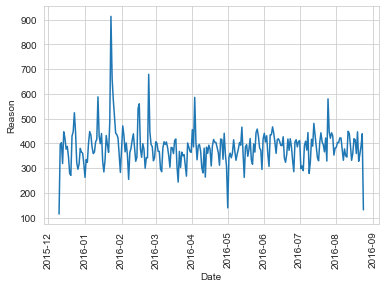

In [142]:
sns.lineplot(data=df_groupby_date, x='Date', y='Reason')
plt.xticks(rotation = 90)
[...]

**Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

In [145]:
df[df['Reason']=='EMS'].groupby('Date').count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
Date,,,,,,,,,,,,,
2015-12-10,57,57,57,52,57,57,57,57,57,57,57,57,57
2015-12-11,186,186,186,166,186,186,186,186,186,186,186,186,186
2015-12-12,189,189,189,171,189,189,189,189,189,189,189,189,189
2015-12-13,190,190,190,178,190,190,190,190,190,190,190,190,190
2015-12-14,222,222,222,201,222,222,222,222,222,222,222,222,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-20,159,159,159,139,159,159,159,159,159,159,159,159,159
2016-08-21,165,165,165,144,165,165,165,165,165,165,165,165,165
2016-08-22,182,182,182,163,182,182,182,182,182,182,182,182,182


[Ellipsis]

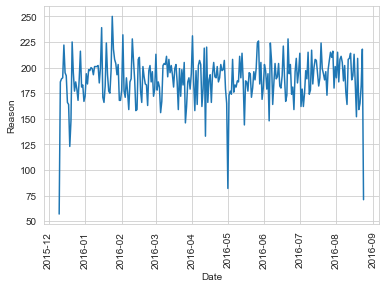

In [147]:
sns.lineplot(data=df[df['Reason']=='EMS'].groupby('Date').count(), x='Date', y='Reason')
plt.xticks(rotation = 90)
[...]

[Ellipsis]

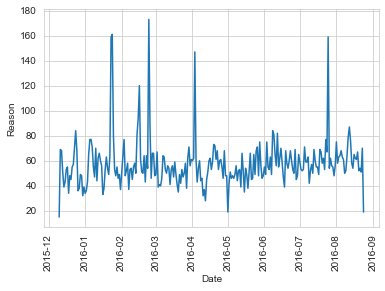

In [148]:
sns.lineplot(data=df[df['Reason']=='Fire'].groupby('Date').count(), x='Date', y='Reason')
plt.xticks(rotation = 90)
[...]

[Ellipsis]

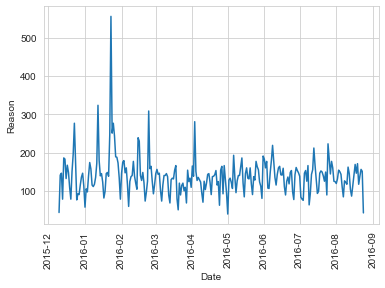

In [149]:
sns.lineplot(data=df[df['Reason']=='Traffic'].groupby('Date').count(), x='Date', y='Reason')
plt.xticks(rotation = 90)
[...]

<hr>

**Restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine Groupby with an [unstack](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.unstack.html) method.**

In [169]:
dayHour = df.groupby(by=['Day of Week', 'Hour']).count()['Reason'].unstack()
dayHour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


**Now create a HeatMap using this new DataFrame.**

<AxesSubplot: xlabel='Hour', ylabel='Day of Week'>

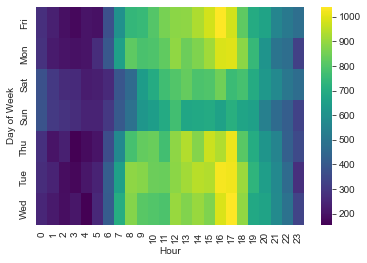

In [175]:
sns.heatmap(dayHour, cmap='viridis')

**Now create a clustermap using this DataFrame.**

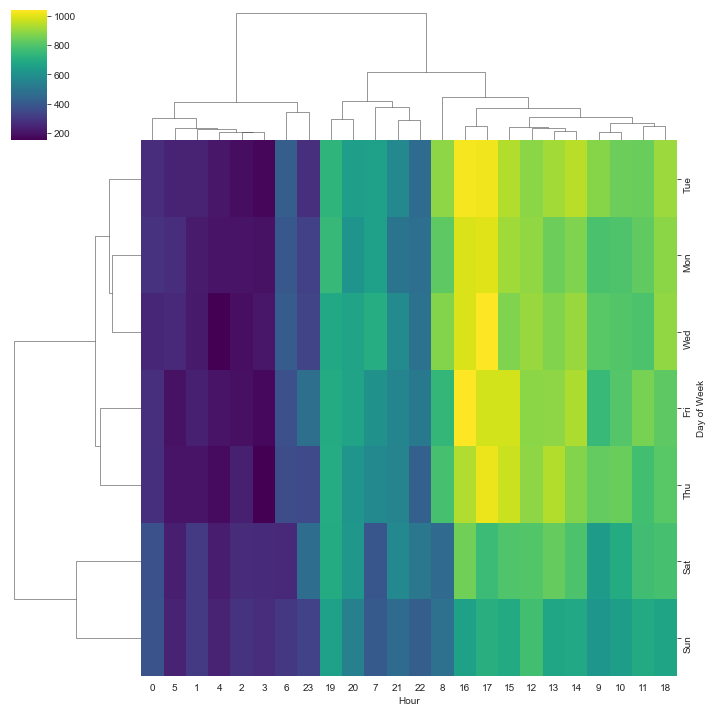

In [176]:
sns.clustermap(dayHour, cmap='viridis')

**Now repeat these same plots and operations, for a DataFrame that shows the Month as the column.**

In [180]:
dayMonth = df.groupby(['Day of Week', 'Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


<AxesSubplot: xlabel='Month', ylabel='Day of Week'>

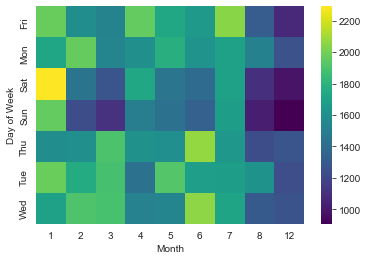

In [181]:
sns.heatmap(dayMonth, cmap='viridis')

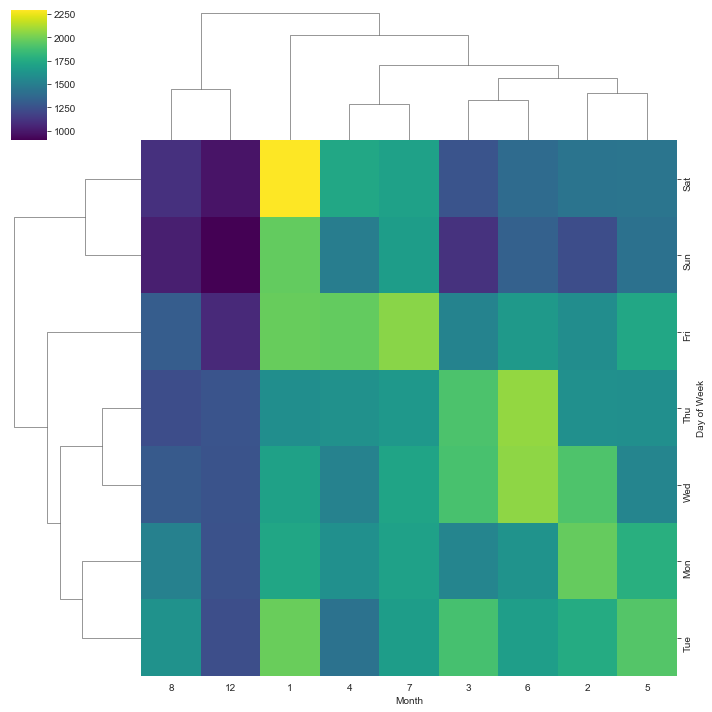

In [183]:
sns.clustermap(dayMonth, cmap='viridis')

<hr>